In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

sns.set_theme()

In [1]:
%load_ext kedro.ipython

[09/05/24 08:35:58] INFO     Registered line magic '%reload_kedro'                                   ]8;id=196864;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=625981;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=910403;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=991447;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=5560;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=511093;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             c:\Users\01121272\Desktop\Projects\gnn-mp-model.                                      
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/05/24 08:36:02] INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=375565;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=341312;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#65\65]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=234104;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=542354;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/01121272/Desktop/Projects/gnn-mp-model/ml                           
                             runs'                                                                                 

[09/05/24 08:36:10] INFO     Kedro project GNN_MP_model                                             ]8;id=873471;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=269413;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=403752;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=690564;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[09/05/24 08:36:12] INFO     Registered line magic 'run_viz'                                        ]8;id=948392;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=675943;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [28]:
full_df = pd.read_csv("full_model_full_results_wo50250.csv")
test_df = pd.read_csv("full_model_test_results_wo50250.csv")
df = pd.read_csv("full_model_all_results.csv")
df2 = pd.read_csv("full_model_fullK_results1908.csv")
df2['preds'] = df2['preds'] - 273.15
df2['target'] = df2['target'] - 273.15

In [29]:
df

,Unnamed: 0,preds,target,smiles,error,cation_smiles,anion_smiles
0,0,183.351959,85.000000,O=S(=O)([O-])O.c1c[nH+]c[nH]1,98.351959,c1c[nH+]c[nH]1,O=S(=O)([O-])O
1,1,167.157120,188.000000,CS(=O)(=O)[O-].c1c[nH+]c[nH]1,20.842880,c1c[nH+]c[nH]1,CS(=O)(=O)[O-]
2,2,191.937668,122.900002,O=S(=O)(O)C(F)(F)F.c1c[nH+]c[nH]1,69.037666,c1c[nH+]c[nH]1,O=S(=O)(O)C(F)(F)F
3,3,75.942299,73.000000,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F.c1c[nH+...,2.942299,c1c[nH+]c[nH]1,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F
4,4,137.143173,131.199997,F[B-](F)(F)F.c1c[nH+]c[nH]1,5.943176,c1c[nH+]c[nH]1,F[B-](F)(F)F
...,...,...,...,...,...,...,...
3278,3278,49.597298,72.949997,C[N+](C)(C)CCO.O=[N+]([O-])[O-],23.352699,C[N+](C)(C)CCO,O=[N+]([O-])[O-]
3279,3279,34.557732,43.750000,CC(=O)[O-].CCCC[NH3+],9.192268,CCCC[NH3+],CC(=O)[O-]
3280,3280,83.090019,75.849998,CC(=O)[O-].CN1CCCN2CCC[NH+]=C12,7.240021,CN1CCCN2CCC[NH+]=C12,CC(=O)[O-]
3281,3281,70.274559,45.450001,CCCC[N+]1(C)CCCC1.O=S(=O)([O-])C(F)(F)C(F)F,24.824558,CCCC[N+]1(C)CCCC1,O=S(=O)([O-])C(F)(F)C(F)F


In [2]:
histo_df_full = catalog.load("merged_database")

[09/05/24 08:36:24] INFO     Loading data from merged_database (CSVDataset)...                  ]8;id=413406;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=67412;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [3]:
histo_df_full

,smiles,MP
0,O=S(=O)([O-])O.c1c[nH+]c[nH]1,85.00
1,CS(=O)(=O)[O-].c1c[nH+]c[nH]1,188.00
2,O=S(=O)(O)C(F)(F)F.c1c[nH+]c[nH]1,122.90
3,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F.c1c[nH+...,73.00
4,F[B-](F)(F)F.c1c[nH+]c[nH]1,131.20
...,...,...
3278,C[N+](C)(C)CCO.O=[N+]([O-])[O-],72.95
3279,CC(=O)[O-].CCCC[NH3+],43.75
3280,CC(=O)[O-].CN1CCCN2CCC[NH+]=C12,75.85
3281,CCCC[N+]1(C)CCCC1.O=S(=O)([O-])C(F)(F)C(F)F,45.45


In [4]:
histo_df = catalog.load("merged_database")

[09/05/24 08:37:53] INFO     Loading data from merged_database (CSVDataset)...                  ]8;id=592221;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=218838;file://c:\Users\01121272\Desktop\Projects\gnn-mp-model\.venv\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [5]:
histo_df

,smiles,MP
0,O=S(=O)([O-])O.c1c[nH+]c[nH]1,85.00
1,CS(=O)(=O)[O-].c1c[nH+]c[nH]1,188.00
2,O=S(=O)(O)C(F)(F)F.c1c[nH+]c[nH]1,122.90
3,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F.c1c[nH+...,73.00
4,F[B-](F)(F)F.c1c[nH+]c[nH]1,131.20
...,...,...
2567,C[N+](C)(C)CCO.O=[N+]([O-])[O-],72.95
2568,CC(=O)[O-].CCCC[NH3+],43.75
2569,CC(=O)[O-].CN1CCCN2CCC[NH+]=C12,75.85
2570,CCCC[N+]1(C)CCCC1.O=S(=O)([O-])C(F)(F)C(F)F,45.45


In [60]:
df = df.where(df["target"] > 0).dropna()
df = df.where(df["target"] < 150).dropna()

In [20]:
df2

,Unnamed: 0,preds,target,smiles,error,cation_smiles,anion_smiles
0,0.0,58.669244,84.999994,O=S(=O)([O-])O.c1c[nH+]c[nH]1,26.330750,c1c[nH+]c[nH]1,O=S(=O)([O-])O
1,1.0,53.540613,187.999994,CS(=O)(=O)[O-].c1c[nH+]c[nH]1,134.459381,c1c[nH+]c[nH]1,CS(=O)(=O)[O-]
2,2.0,55.586145,122.899988,O=S(=O)(O)C(F)(F)F.c1c[nH+]c[nH]1,67.313843,c1c[nH+]c[nH]1,O=S(=O)(O)C(F)(F)F
3,3.0,36.613336,72.999994,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F.c1c[nH+...,36.386658,c1c[nH+]c[nH]1,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F
4,4.0,56.114709,131.200006,F[B-](F)(F)F.c1c[nH+]c[nH]1,75.085297,c1c[nH+]c[nH]1,F[B-](F)(F)F
...,...,...,...,...,...,...,...
2775,2775.0,55.669153,286.699976,CCCCn1cc[n+](CCOC)c1CC.O=S(=O)([N-]S(=O)(=O)C(...,231.030823,CCCCn1cc[n+](CCOC)c1CC,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F
2776,2776.0,49.930322,289.000024,CCCCCn1cc[n+](CCOC)c1C.O=S(=O)([N-]S(=O)(=O)C(...,239.069702,CCCCCn1cc[n+](CCOC)c1C,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F
2777,2777.0,54.397668,278.399988,CCCCCn1cc[n+](CCOC)c1CC.O=S(=O)([N-]S(=O)(=O)C...,224.002319,CCCCCn1cc[n+](CCOC)c1CC,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F
2778,2778.0,51.993799,331.300012,COCCn1cc[n+](CCOC)c1C.O=S(=O)([N-]S(=O)(=O)C(F...,279.306213,COCCn1cc[n+](CCOC)c1C,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F


In [4]:
df

,Unnamed: 0,preds,target,smiles,error,cation_smiles,anion_smiles
0,0.0,183.351959,85.000000,O=S(=O)([O-])O.c1c[nH+]c[nH]1,98.351959,c1c[nH+]c[nH]1,O=S(=O)([O-])O
1,1.0,167.157120,188.000000,CS(=O)(=O)[O-].c1c[nH+]c[nH]1,20.842880,c1c[nH+]c[nH]1,CS(=O)(=O)[O-]
2,2.0,191.937668,122.900002,O=S(=O)(O)C(F)(F)F.c1c[nH+]c[nH]1,69.037666,c1c[nH+]c[nH]1,O=S(=O)(O)C(F)(F)F
3,3.0,75.942299,73.000000,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F.c1c[nH+...,2.942299,c1c[nH+]c[nH]1,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F
4,4.0,137.143173,131.199997,F[B-](F)(F)F.c1c[nH+]c[nH]1,5.943176,c1c[nH+]c[nH]1,F[B-](F)(F)F
...,...,...,...,...,...,...,...
2775,2775.0,63.833267,286.700012,CCCCn1cc[n+](CCOC)c1CC.O=S(=O)([N-]S(=O)(=O)C(...,222.866745,CCCCn1cc[n+](CCOC)c1CC,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F
2776,2776.0,61.607788,289.000000,CCCCCn1cc[n+](CCOC)c1C.O=S(=O)([N-]S(=O)(=O)C(...,227.392212,CCCCCn1cc[n+](CCOC)c1C,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F
2777,2777.0,66.765915,278.399994,CCCCCn1cc[n+](CCOC)c1CC.O=S(=O)([N-]S(=O)(=O)C...,211.634079,CCCCCn1cc[n+](CCOC)c1CC,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F
2778,2778.0,57.165367,331.299988,COCCn1cc[n+](CCOC)c1C.O=S(=O)([N-]S(=O)(=O)C(F...,274.134621,COCCn1cc[n+](CCOC)c1C,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F


In [53]:
full_df = full_df.where(full_df["target"] > 0).dropna()

[09/05/24 08:52:05] WARNING  C:\Users\01121272\AppData\Local\Temp\ipykernel_8672\1832223250.py:4:   ]8;id=784326;file://C:\Users\01121272\AppData\Local\Programs\Python\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=761473;file://C:\Users\01121272\AppData\Local\Programs\Python\Python311\Lib\warnings.py#110\110]8;;\
                             UserWarning: Ignoring `palette` because no `hue` variable has been                    
                             assigned.                                                                             
                               sns.histplot(histo_df, x="MP",     palette="light:m_r",                             
                                                                                                                   

Text(0.5, 1.0, 'Histogram of melting point values after data limitation')

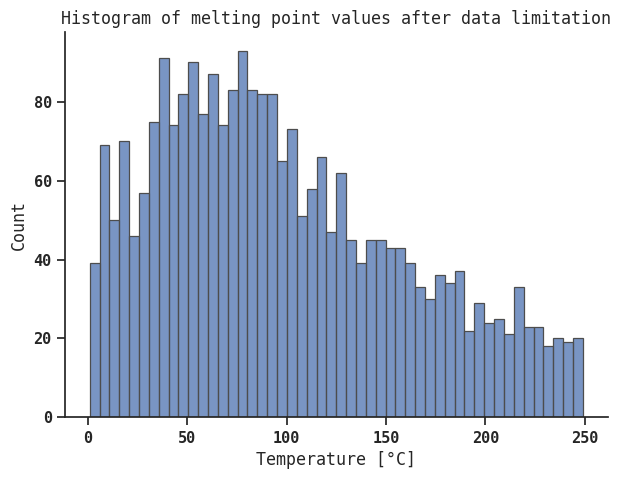

In [25]:
## Histogram
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(histo_df, x="MP",     palette="light:m_r",
    edgecolor=".3",
    linewidth=.9,
    binwidth = 5
)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : '5'}

mpl.rc('font', **font)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel("Temperature [°C]")
ax.set_title("Histogram of melting point values after data limitation")

[09/05/24 08:52:23] WARNING  C:\Users\01121272\AppData\Local\Temp\ipykernel_8672\3538120646.py:4:   ]8;id=88001;file://C:\Users\01121272\AppData\Local\Programs\Python\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=608878;file://C:\Users\01121272\AppData\Local\Programs\Python\Python311\Lib\warnings.py#110\110]8;;\
                             UserWarning: Ignoring `palette` because no `hue` variable has been                    
                             assigned.                                                                             
                               sns.histplot(histo_df_full, x="MP",     palette="light:m_r",                        
                                                                                                                   

Text(0.5, 1.0, 'Histogram of melting point values before data limitation')

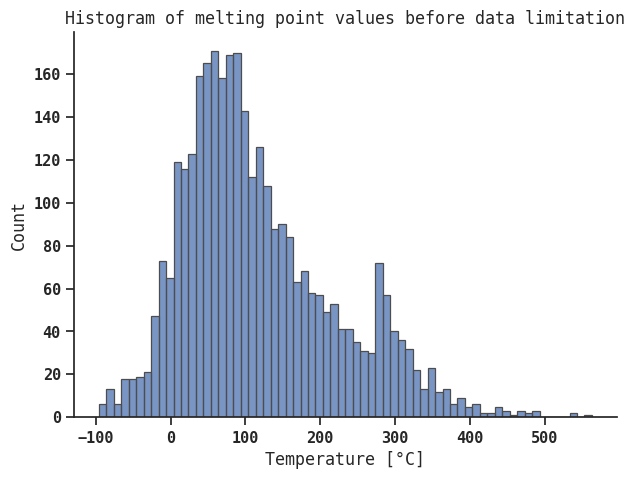

In [27]:
## Double histogram
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(histo_df_full, x="MP",     palette="light:m_r",
    edgecolor=".3",
    linewidth=.9,
    binwidth = 10
)

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : '5'}

mpl.rc('font', **font)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel("Temperature [°C]")
ax.set_title("Histogram of melting point values before data limitation")


[09/05/24 08:49:04] WARNING  C:\Users\01121272\AppData\Local\Temp\ipykernel_8672\862288.py:4:       ]8;id=106863;file://C:\Users\01121272\AppData\Local\Programs\Python\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=148233;file://C:\Users\01121272\AppData\Local\Programs\Python\Python311\Lib\warnings.py#110\110]8;;\
                             UserWarning: Ignoring `palette` because no `hue` variable has been                    
                             assigned.                                                                             
                               sns.histplot(histo_df, x="MP",     palette="light:m_r",                             
                                                                                                                   


[
]

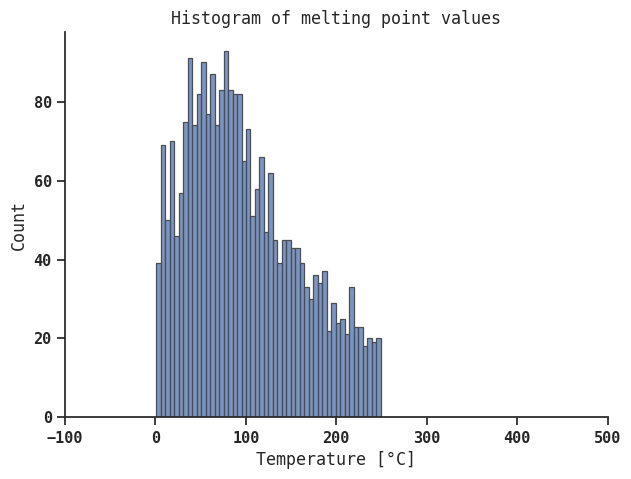

In [19]:
## Double histogram
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(histo_df, x="MP",     palette="light:m_r",
    edgecolor=".3",
    linewidth=.9,
    binwidth = 5
)

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : '5'}

mpl.rc('font', **font)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel("Temperature [°C]")
ax.set_title("Histogram of melting point values")
ax.set_xticks([-100, 0,100, 200, 300, 400, 500,])

In [ ]:
df2

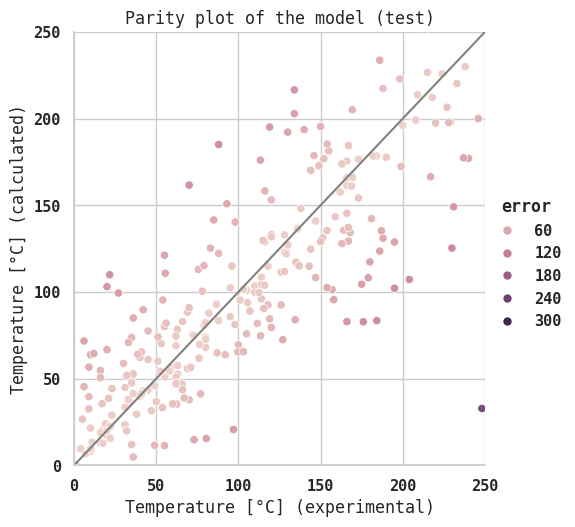

In [52]:
## Scatter plot with marked temperatures and errors

sns.set_theme(style="whitegrid")
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : '5'}

mpl.rc('font', **font)
g = sns.relplot(x="target", y="preds", hue="error", data=test_df)
g.ax.set_xlim(0, 250)
g.ax.set_ylim(0, 250)
g.ax.set_xlabel("Temperature [°C] (experimental)")
g.ax.set_ylabel("Temperature [°C] (calculated)")
g.ax.set_title("Parity plot of the model (test)")
plt.plot([0, 250], [0, 250], color = 'grey')


Text(0.5, 1.0, 'Parity plot of the model (test)')

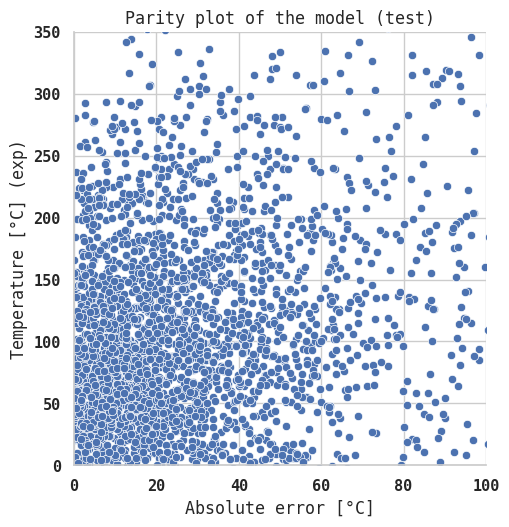

In [19]:
## Scatter plot with marked temperatures and errors

sns.set_theme(style="whitegrid")
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : '5'}

mpl.rc('font', **font)
g = sns.relplot(x='error', y="target", data=df)
g.ax.set_ylim(0, 350)
g.ax.set_xlim(0, 100)
g.ax.set_ylabel("Temperature [°C] (exp)")
g.ax.set_xlabel("Absolute error [°C]")
g.ax.set_title("Parity plot of the model (test)")

In [61]:
from sklearn.metrics import r2_score
mae = df["error"].mean()
r2 = r2_score(df["target"], df["preds"])


[
]

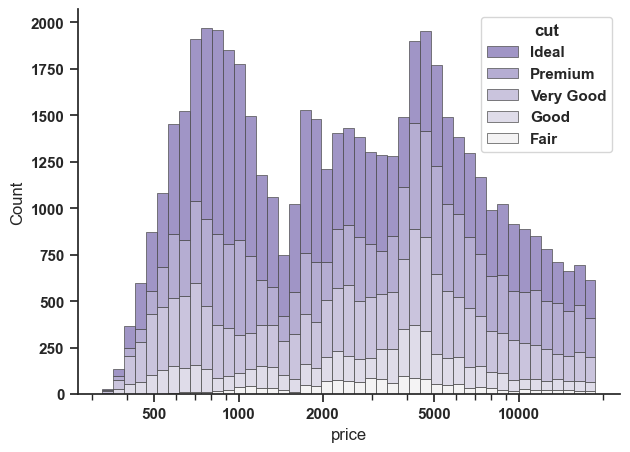

In [16]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [17]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
